In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats

# Adjusting the size of matplotlib
import matplotlib as mpl

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 9, 14)

tick = "AAPL"

df = web.DataReader(tick, 'yahoo', start, end)
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-09,216.440002,211.070007,214.839996,214.169998,27309400.0,214.169998
2019-09-10,216.779999,211.710007,213.860001,216.699997,31777900.0,216.699997
2019-09-11,223.710007,217.729996,218.070007,223.589996,44289600.0,223.589996
2019-09-12,226.419998,222.860001,224.800003,223.089996,32226700.0,223.089996
2019-09-13,220.789993,217.020004,220.000000,218.750000,39763300.0,218.750000


In [4]:
# Rolling mean
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg
totalvolume =df['Volume']
totalvolume

Date
2014-01-02     58671200.0
2014-01-03     98116900.0
2014-01-06    103152700.0
2014-01-07     79302300.0
2014-01-08     64632400.0
2014-01-09     69787200.0
2014-01-10     76244000.0
2014-01-13     94623200.0
2014-01-14     83140400.0
2014-01-15     97909700.0
2014-01-16     57319500.0
2014-01-17    106684900.0
2014-01-21     82131700.0
2014-01-22     94996300.0
2014-01-23    100809800.0
2014-01-24    107338700.0
2014-01-27    138719700.0
2014-01-28    266380800.0
2014-01-29    125702500.0
2014-01-30    169625400.0
2014-01-31    116199300.0
2014-02-03    100366000.0
2014-02-04     94170300.0
2014-02-05     82086200.0
2014-02-06     64441300.0
2014-02-07     92570100.0
2014-02-10     86389800.0
2014-02-11     70564200.0
2014-02-12     77025200.0
2014-02-13     76849500.0
                 ...     
2019-08-02     40862100.0
2019-08-05     52393000.0
2019-08-06     35824800.0
2019-08-07     33364400.0
2019-08-08     27009500.0
2019-08-09     24619700.0
2019-08-12     22474900.0
2019-08

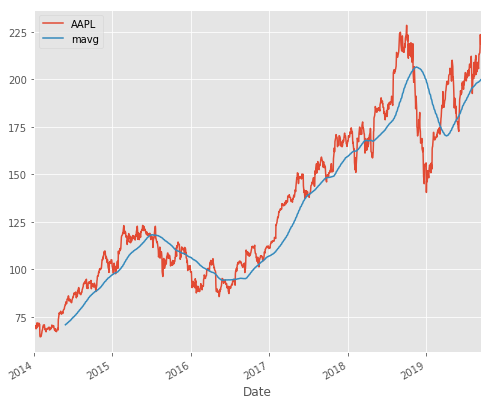

In [5]:
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
#totalvolume.plot(kind ='bar')
plt.legend()


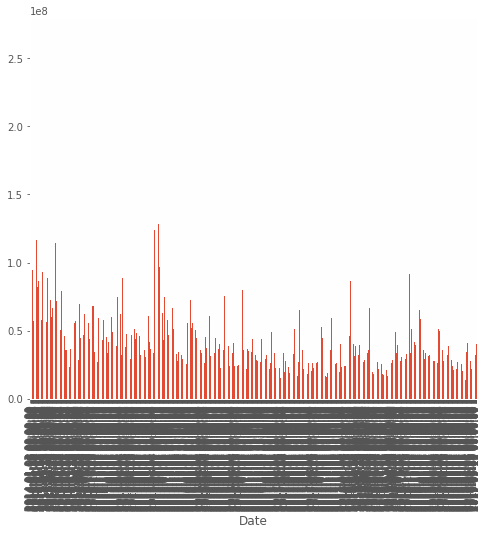

In [6]:
totalvolume.plot(kind ='bar')

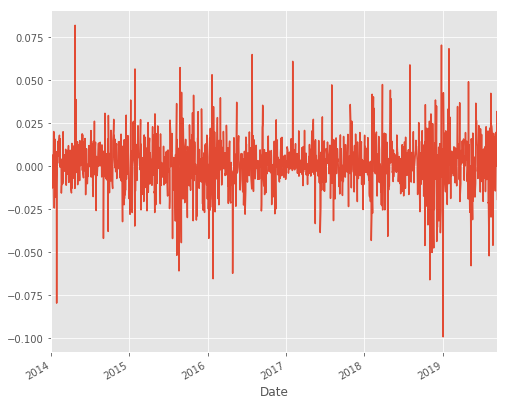

In [7]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [9]:
sectortypes_df = pd.read_csv("Ticker_simple_info.csv")
sectortypes_df.head()
tickergroup = sectortypes_df.groupby(sectortypes_df["Company Type"])
tickergroup.count()

,Unnamed: 0,Ticker,Company Name
Company Type,,,
Consumer Discretionary,82,82,82
Consumer Staples,34,34,34
Energy,31,31,31
Financials,69,69,69
Health Care,61,61,61
Industrials,67,67,67
Information Technology,72,72,72
Materials,25,25,25
Real Estate,33,33,33


In [10]:
It_df =  (sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Information Technology']).head(10)
It_list = It_df.tolist()
It_list

['ACN', 'ATVI', 'ADBE', 'AMD', 'AKAM', 'ADS', 'GOOGL', 'GOOG', 'APH', 'ADI']

In [11]:
#dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp = web.DataReader(It_list,'yahoo',start=start,end=end)['Adj Close']


In [12]:
dfcomp

Symbols,ACN,ADBE,ADI,ADS,AKAM,AMD,APH,ATVI,GOOG,GOOGL
Date,,,,,,,,,,
2014-01-02,71.681305,59.290001,42.808182,253.380310,46.529999,3.950000,41.282707,17.238548,554.481689,557.117126
2014-01-03,71.919853,59.160000,43.094849,254.693909,46.450001,4.000000,41.433262,17.448429,550.436829,553.053040
2014-01-06,71.160019,58.119999,42.851624,249.468643,46.110001,4.130000,41.052158,17.248093,556.573853,559.219238
2014-01-07,72.025879,58.970001,43.077473,246.474487,47.009998,4.180000,41.329742,17.477047,567.303589,570.000000
2014-01-08,72.582512,58.900002,43.181717,249.178848,46.680000,4.180000,41.560303,17.496126,568.484192,571.186157
2014-01-09,73.289322,59.090000,43.016651,250.125397,47.619999,4.090000,42.073162,17.457968,563.009705,565.685669
2014-01-10,73.510231,59.529999,43.025352,249.439636,48.200001,4.170000,42.035515,17.343489,562.979797,565.655640
2014-01-13,71.619453,58.599998,42.452034,242.437241,46.299999,4.130000,41.964943,17.047754,559.393250,562.052063
2014-01-14,72.405800,60.369999,43.181717,247.082977,47.439999,4.300000,43.480000,16.685236,572.553955,575.275269


In [13]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr
#retscomp.AAPL

Symbols,ACN,ADBE,ADI,ADS,AKAM,AMD,APH,ATVI,GOOG,GOOGL
Symbols,,,,,,,,,,
ACN,1.000000,0.535572,0.454315,0.397256,0.405637,0.260962,0.566612,0.406412,0.485342,0.487889
ADBE,0.535572,1.000000,0.474132,0.364942,0.393202,0.296545,0.503997,0.475211,0.548061,0.554540
ADI,0.454315,0.474132,1.000000,0.355170,0.347241,0.373764,0.539574,0.376488,0.412942,0.412561
ADS,0.397256,0.364942,0.355170,1.000000,0.365022,0.231017,0.404696,0.253810,0.315537,0.313252
AKAM,0.405637,0.393202,0.347241,0.365022,1.000000,0.193272,0.428998,0.313274,0.351676,0.354401
AMD,0.260962,0.296545,0.373764,0.231017,0.193272,1.000000,0.306159,0.237328,0.215887,0.213681
APH,0.566612,0.503997,0.539574,0.404696,0.428998,0.306159,1.000000,0.391953,0.487462,0.486849
ATVI,0.406412,0.475211,0.376488,0.253810,0.313274,0.237328,0.391953,1.000000,0.451340,0.452965
GOOG,0.485342,0.548061,0.412942,0.315537,0.351676,0.215887,0.487462,0.451340,1.000000,0.991599


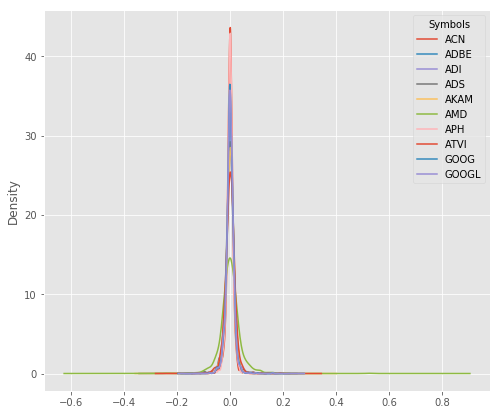

In [14]:
ax = retscomp.plot.kde()

<Figure size 1440x1080 with 0 Axes>

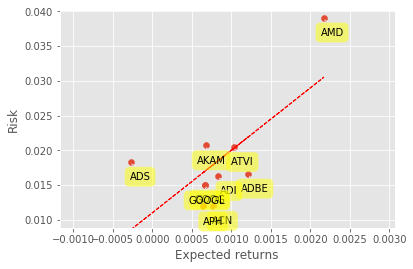

<Figure size 1440x1080 with 0 Axes>

In [42]:
plt.margins(x=0, y=-0.01)
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
tol_slope, tol_int, tol_r, tol_p, tol_std_err = stats.linregress(retscomp.mean(), retscomp.std())
tol_slope
tol_int
tol_fit = tol_slope * retscomp.mean()+ tol_int
tol_fit
plt.plot(retscomp.mean(), tol_fit, "r--", linewidth=1)
plt.figure(figsize=(20,15))


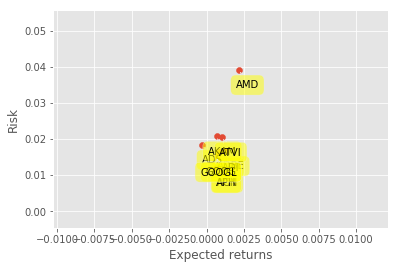

In [26]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Text(0, 0.5, 'Returns_GOOG')

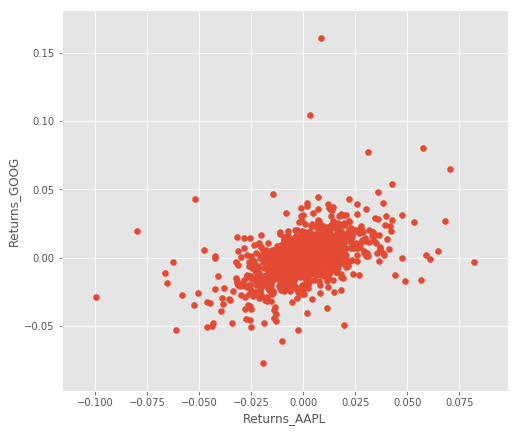

In [27]:
plt.scatter(retscomp.AAPL, retscomp.GOOG)
plt.xlabel("Returns_AAPL")
plt.ylabel("Returns_GOOG")

In [53]:
pd.scatter_matrix(retscomp, diagonal =‘kde’, figsize=(10, 10));

SyntaxError: invalid character in identifier (<ipython-input-53-d0f2566c9bb8>, line 1)

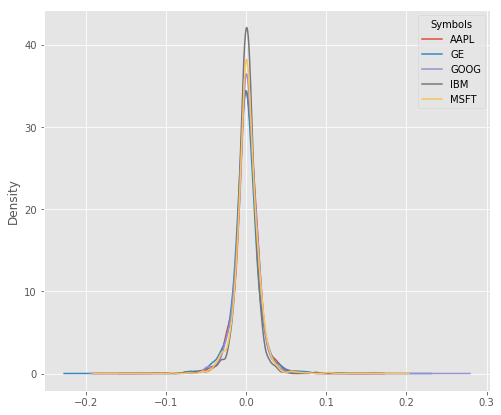

In [54]:
ax = retscomp.plot.kde()

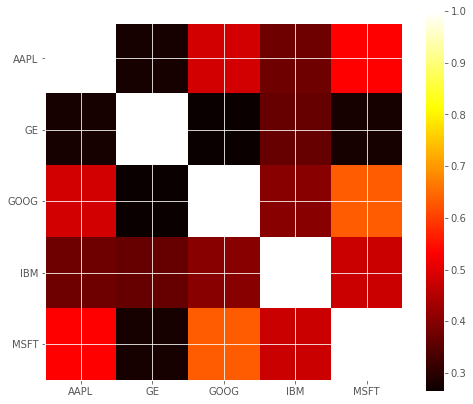

In [47]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

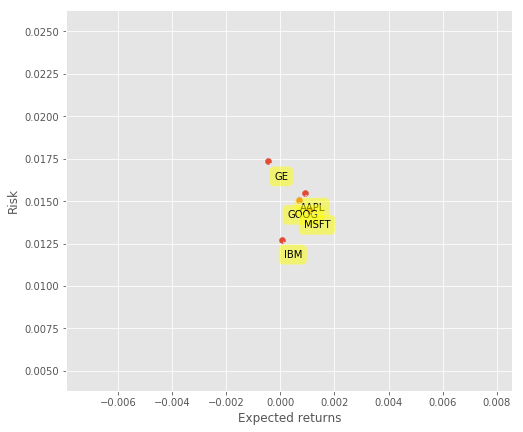

In [50]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))